In [ ]:
import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers

from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

import helper_functions as hf

CURDIR = os.path.dirname(os.getcwd())
DATADIR = os.path.join(CURDIR,  "data")
FIGDIR = os.path.join(CURDIR,  "figure")
%matplotlib inline

df_blockchain = pd.read_csv("df_blockchain.csv", delimiter=",")
# get columns (You can add more columns to analyse results)
columns = ["market-price"]
dataset = df_blockchain[columns]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,len(columns)))
# split datatest into data_train, data_valid and data_test

data_train = dataset[:3000]
data_valid = dataset[3000:-30]
data_test = dataset[-30:]
rnn_size = 3
def process_data(data, rnn_size, target_id=0, columns_size=len(columns)):
    X = []
    y = []
    for i in range(len(data)-rnn_size):
        X.append(data[i:i+rnn_size,:])
        y.append(data[i+rnn_size,0])
    return np.array(X).astype(np.float32).reshape((-1,rnn_size,columns_size)), np.array(y).astype(np.float32)
    # process data for RNN
X_train, y_train = process_data(data_train,rnn_size)
X_val, y_val = process_data(data_valid,rnn_size)
X_test, y_test = process_data(data_test,rnn_size)
data_sets = [y_train, y_val, y_test]
for set in data_sets :
    set = set.reshape(len(set), 1)

# LSTM + Dense model

# Parameters

h1 = 50 # Size of LSTM layer
lambda2=0.00001

# Build the models

model_names = ['lstm', 'stk_lstm', 'dd_lstm']
model_list = []

## LSTM model

lstm = keras.Sequential()
lstm.add(layers.LSTM(h1, kernel_regularizer = regularizers.l2(lambda2), return_sequences=True, input_shape = (X_train.shape[1], 1)))
lstm.add(layers.Dense(1, kernel_regularizer = regularizers.l2(lambda2), activation = 'relu'))
model_list.append(lstm)

## Stacked-LSTM model

stk_lstm = keras.Sequential()
stk_lstm.add(layers.LSTM(h1, kernel_regularizer = regularizers.l2(lambda2), return_sequences=True, input_shape = (X_train.shape[1], 1)))
stk_lstm.add(layers.LSTM(h1, kernel_regularizer = regularizers.l2(lambda2), return_sequences=True))
stk_lstm.add(layers.Dense(1, kernel_regularizer = regularizers.l2(lambda2), activation = 'relu'))
model_list.append(stk_lstm)

## Double-dense-LSTM model

dd_lstm = keras.Sequential()
dd_lstm.add(layers.LSTM(h1, kernel_regularizer = regularizers.l2(lambda2)))
dd_lstm.add(layers.Dense(10,kernel_regularizer = regularizers.l2(lambda2)))
dd_lstm.add(layers.Dense(1, kernel_regularizer = regularizers.l2(lambda2), activation = 'relu'))
model_list.append(stk_lstm)

# ## Attention-LSTM model

# att_lstm = keras.Sequential()
# att_lstm.add(layers.LSTM(h1, kernel_regularizer = regularizers.l2(lambda2)))
# att_lstm.add(layers.Attention())
# model_list.append(att_lstm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# plot the rmse of the lstm model according to the numboer of epochs

rmse_train = []
rmse_test = []
N = 100

for i in range(N):
    print(f'Fit with {i+1} epochs')
    lstm.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.Adam())
    lstm.fit(X_train, y_train, batch_size = 32, epochs = i, validation_data = (X_val, y_val), verbose = 0)

    # RMSE for train
    y = lstm.predict(X_train)
    y_inverse = scaler.inverse_transform(np.concatenate([y.reshape(len(y),rnn_size), data_train[-len(y):,:]], axis=1))
    y_train_inverse = scaler.inverse_transform(data_train.reshape(-1,len(columns)))[rnn_size:]
    rmse = np.sqrt(np.mean((y_inverse - y_train_inverse)**2))
    rmse_train.append(rmse)

    # RMSE for test
    y_pred = lstm.predict(X_test)
    y_pred_inverse = scaler.inverse_transform(np.concatenate([y_pred.reshape(len(y_pred),rnn_size), data_test[-len(y_pred):,:]], axis=1))
    y_test_inverse = scaler.inverse_transform(data_test.reshape(-1,len(columns)))[rnn_size:]
    rmse_score = np.sqrt(np.mean((y_pred_inverse - y_test_inverse)**2))
    rmse_test.append(rmse_score)

Fit with 1 epochs
Fit with 2 epochs
Fit with 3 epochs
Fit with 4 epochs
Fit with 5 epochs
Fit with 6 epochs
Fit with 7 epochs
Fit with 8 epochs
Fit with 9 epochs
Fit with 10 epochs
Fit with 11 epochs
Fit with 12 epochs
Fit with 13 epochs
Fit with 14 epochs
Fit with 15 epochs
Fit with 16 epochs
Fit with 17 epochs
Fit with 18 epochs
Fit with 19 epochs
Fit with 20 epochs
Fit with 21 epochs
Fit with 22 epochs
Fit with 23 epochs
Fit with 24 epochs
Fit with 25 epochs
Fit with 26 epochs
Fit with 27 epochs
Fit with 28 epochs
Fit with 29 epochs
Fit with 30 epochs
Fit with 31 epochs
Fit with 32 epochs
Fit with 33 epochs
Fit with 34 epochs
Fit with 35 epochs
Fit with 36 epochs
Fit with 37 epochs
Fit with 38 epochs
Fit with 39 epochs
Fit with 40 epochs
Fit with 41 epochs
Fit with 42 epochs
Fit with 43 epochs
Fit with 44 epochs
Fit with 45 epochs
Fit with 46 epochs
Fit with 47 epochs
Fit with 48 epochs
Fit with 49 epochs
Fit with 50 epochs
Fit with 51 epochs
Fit with 52 epochs
Fit with 53 epochs
Fi

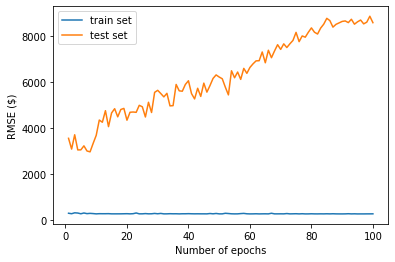

In [ ]:
# plot the graph

n_epoch = np.arange(1,N+1)
rmse_train = np.array(rmse_train)
rmse_test = np.array(rmse_test)

plt.plot(n_epoch, rmse_train, label='train set')
plt.plot(n_epoch, rmse_test, label='test set')
plt.xlabel('Number of epochs')
plt.ylabel('RMSE ($)')
plt.legend()
plt.show()